In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# DataSet 13

In [109]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book13.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2622,MADHYA MAHARASHTRA,1901,18.8,0.6,7.7,36.6,30.4,107.7,215.9,194.1,83.7,68.7,4.4,0.5,769.0,19.4,74.7,601.4,73.5
1,2623,MADHYA MAHARASHTRA,1902,7.8,0.0,0.1,5.0,9.8,102.6,210.9,114.5,169.5,60.4,40.5,62.9,784.0,7.8,14.9,597.5,163.8
2,2624,MADHYA MAHARASHTRA,1903,7.6,0.0,0.0,3.2,77.2,86.3,281.8,155.5,142.3,74.2,7.6,2.2,837.9,7.6,80.4,665.9,84.1
3,2625,MADHYA MAHARASHTRA,1904,0.4,4.7,1.7,3.0,18.7,114.6,126.5,59.5,183.0,91.1,0.0,0.4,603.5,5.1,23.4,483.6,91.4
4,2626,MADHYA MAHARASHTRA,1905,0.0,1.2,0.0,2.3,23.6,65.0,252.8,79.0,52.6,52.9,8.3,0.0,537.8,1.2,25.9,449.5,61.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2732,MADHYA MAHARASHTRA,2011,0.0,0.3,0.3,5.0,2.9,133.3,261.4,238.1,148.4,62.8,0.0,0.0,852.6,0.3,8.2,781.3,62.8
111,2733,MADHYA MAHARASHTRA,2012,0.0,0.0,0.0,3.0,1.4,67.9,203.0,187.8,129.5,95.2,2.2,0.0,689.8,0.0,4.4,588.1,97.3
112,2734,MADHYA MAHARASHTRA,2013,0.1,5.3,0.8,5.7,6.0,212.4,311.8,147.0,210.3,57.8,4.0,1.3,962.4,5.3,12.4,881.5,63.1
113,2735,MADHYA MAHARASHTRA,2014,3.1,6.2,24.4,7.5,29.8,44.0,277.9,240.3,120.4,38.5,32.8,13.1,838.0,9.3,61.7,682.6,84.4


In [110]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [111]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2622,MADHYA MAHARASHTRA,1901,18.8,0.6,7.7,36.6,30.4,107.7,215.9,194.1,83.7,68.7,4.4,0.5,769.0,19.4,74.7,601.4,73.5
1,2623,MADHYA MAHARASHTRA,1902,7.8,0.0,0.1,5.0,9.8,102.6,210.9,114.5,169.5,60.4,40.5,62.9,784.0,7.8,14.9,597.5,163.8
2,2624,MADHYA MAHARASHTRA,1903,7.6,0.0,0.0,3.2,77.2,86.3,281.8,155.5,142.3,74.2,7.6,2.2,837.9,7.6,80.4,665.9,84.1
3,2625,MADHYA MAHARASHTRA,1904,0.4,4.7,1.7,3.0,18.7,114.6,126.5,59.5,183.0,91.1,0.0,0.4,603.5,5.1,23.4,483.6,91.4
4,2626,MADHYA MAHARASHTRA,1905,0.0,1.2,0.0,2.3,23.6,65.0,252.8,79.0,52.6,52.9,8.3,0.0,537.8,1.2,25.9,449.5,61.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2732,MADHYA MAHARASHTRA,2011,0.0,0.3,0.3,5.0,2.9,133.3,261.4,238.1,148.4,62.8,0.0,0.0,852.6,0.3,8.2,781.3,62.8
111,2733,MADHYA MAHARASHTRA,2012,0.0,0.0,0.0,3.0,1.4,67.9,203.0,187.8,129.5,95.2,2.2,0.0,689.8,0.0,4.4,588.1,97.3
112,2734,MADHYA MAHARASHTRA,2013,0.1,5.3,0.8,5.7,6.0,212.4,311.8,147.0,210.3,57.8,4.0,1.3,962.4,5.3,12.4,881.5,63.1
113,2735,MADHYA MAHARASHTRA,2014,3.1,6.2,24.4,7.5,29.8,44.0,277.9,240.3,120.4,38.5,32.8,13.1,838.0,9.3,61.7,682.6,84.4


<AxesSubplot:>

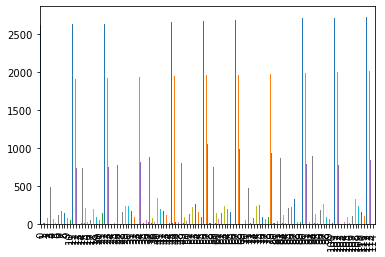

In [112]:
b.plot.bar(legend=None)

<AxesSubplot:>

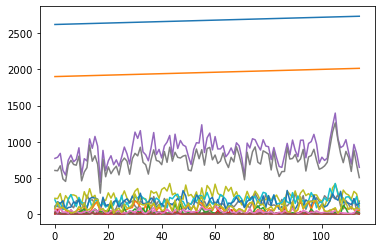

In [113]:
b.plot.line(legend=None)

<AxesSubplot:>

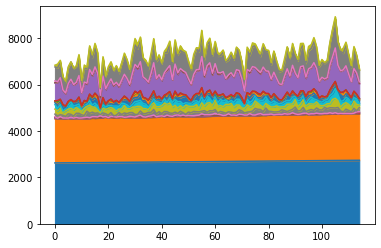

In [114]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

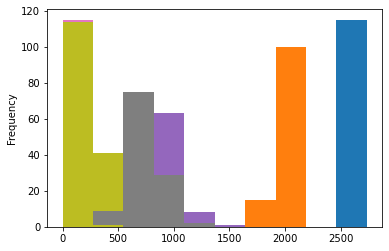

In [115]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='YEAR'>

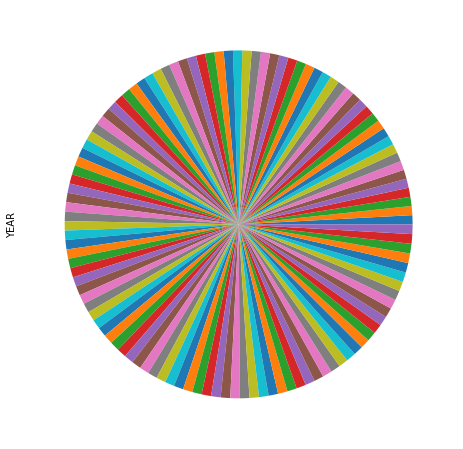

In [116]:
b.plot.pie(y='YEAR',figsize=(8,8),labels=None,legend=None)

# DataSet 14

In [117]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book14.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2507,KONKAN & GOA,1901,5.6,0.1,0.4,35.7,19.9,746.1,1075.5,748.0,117.4,38.6,5.4,0.1,2792.9,5.7,56.0,2687.0,44.1
1,2508,KONKAN & GOA,1902,0.3,0.0,0.0,0.4,7.6,428.2,943.6,515.1,613.8,74.3,42.7,48.0,2673.9,0.3,8.0,2500.6,165.0
2,2509,KONKAN & GOA,1903,0.0,0.0,0.1,0.0,201.1,470.5,1298.6,673.9,285.1,140.8,12.4,1.7,3084.3,0.0,201.2,2728.2,154.9
3,2510,KONKAN & GOA,1904,0.0,0.1,6.6,6.3,4.6,975.8,771.7,321.3,217.0,90.3,0.0,0.0,2393.7,0.1,17.5,2285.8,90.3
4,2511,KONKAN & GOA,1905,0.1,0.1,0.0,0.4,8.6,293.7,770.6,305.5,208.3,83.5,12.1,0.0,1682.8,0.2,9.0,1578.1,95.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2617,KONKAN & GOA,2011,0.0,0.0,0.0,3.4,1.1,857.0,1384.1,987.9,468.3,120.3,3.1,0.0,3825.2,0.0,4.5,3697.3,123.5
111,2618,KONKAN & GOA,2012,0.0,0.0,0.0,0.6,1.1,633.0,928.5,762.5,515.3,175.1,2.3,0.0,3018.4,0.0,1.7,2839.3,177.4
112,2619,KONKAN & GOA,2013,1.8,5.4,0.1,0.1,18.5,1028.3,1478.5,497.6,340.7,149.3,2.1,1.5,3524.0,7.3,18.7,3345.2,152.8
113,2620,KONKAN & GOA,2014,1.3,5.3,1.8,0.7,21.3,238.2,1293.2,658.0,419.5,98.7,8.0,11.7,2757.5,6.6,23.8,2608.8,118.4


In [118]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

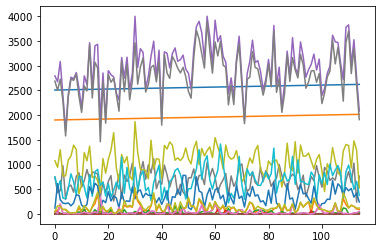

In [119]:
a.plot.line(legend=None)

<AxesSubplot:>

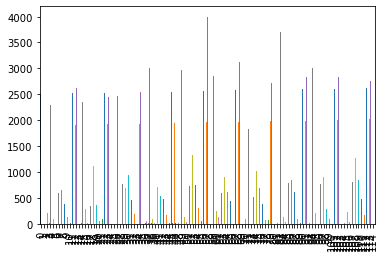

In [120]:
a.plot.bar(legend=None)

<AxesSubplot:>

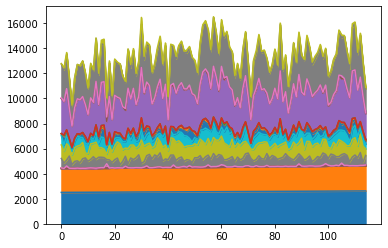

In [121]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

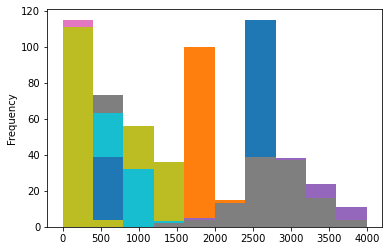

In [122]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAY'>

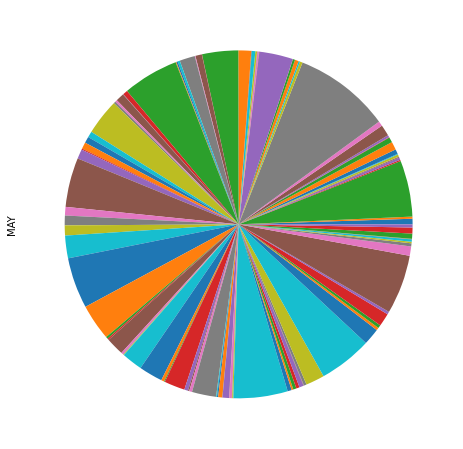

In [123]:
a.plot.pie(y='MAY',figsize=(8,8),labels=None,legend=None)

# DataSet 15

In [124]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book15.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2392,SAURASHTRA & KUTCH,1901,1.9,0.0,0.1,0.2,3.2,9.1,87.8,62.5,12.0,3.8,0.0,0.7,181.3,1.9,3.5,171.4,4.4
1,2393,SAURASHTRA & KUTCH,1902,0.1,0.0,0.0,0.5,1.1,14.4,92.9,160.0,123.9,1.5,0.1,6.5,401.1,0.1,1.6,391.2,8.2
2,2394,SAURASHTRA & KUTCH,1903,0.5,0.0,1.7,0.0,3.1,10.5,337.9,96.1,61.9,11.1,0.0,0.0,522.8,0.5,4.8,506.4,11.1
3,2395,SAURASHTRA & KUTCH,1904,1.4,5.8,17.5,0.0,0.0,9.5,111.2,9.4,28.9,0.3,1.7,0.0,185.6,7.1,17.5,159.0,2.0
4,2396,SAURASHTRA & KUTCH,1905,1.5,1.0,0.6,0.4,0.0,6.4,254.5,12.3,12.8,0.4,0.0,0.0,290.0,2.5,1.0,286.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2502,SAURASHTRA & KUTCH,2011,0.0,1.4,0.0,0.0,0.0,26.0,212.7,290.9,210.1,1.2,0.1,0.0,742.5,1.4,0.0,739.8,1.3
111,2503,SAURASHTRA & KUTCH,2012,0.0,0.0,0.0,0.2,0.1,22.4,34.7,34.5,228.5,2.4,0.0,1.0,323.8,0.0,0.2,320.1,3.4
112,2504,SAURASHTRA & KUTCH,2013,1.7,0.2,0.1,8.5,0.1,127.7,171.2,83.3,260.2,28.6,0.0,0.0,681.8,1.9,8.7,642.5,28.6
113,2505,SAURASHTRA & KUTCH,2014,0.3,0.0,0.1,0.5,2.1,17.3,137.7,118.8,99.2,5.2,2.7,0.0,383.9,0.3,2.7,373.0,7.8


In [125]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

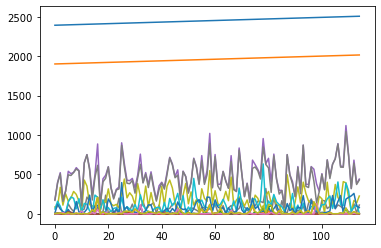

In [126]:
a.plot.line(legend=None)

<AxesSubplot:>

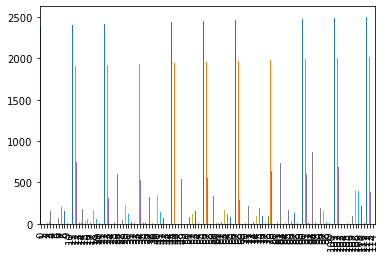

In [127]:
a.plot.bar(legend=None)

<AxesSubplot:>

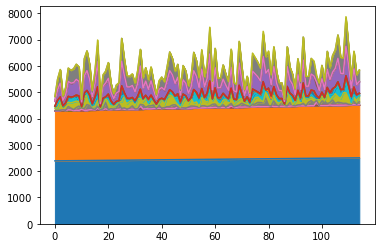

In [128]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

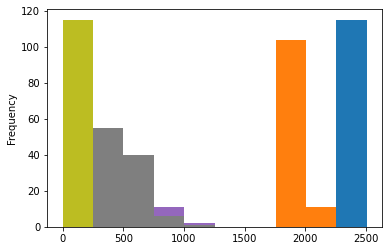

In [129]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='FEB'>

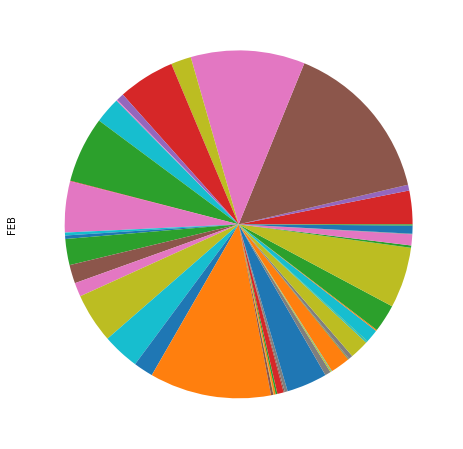

In [130]:
a.plot.pie(y='FEB',figsize=(8,8),labels=None,legend=None)

# DataSet 16

In [131]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book16.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2277,GUJARAT REGION,1901,4.2,0.0,0.6,1.6,7.0,60.3,240.2,205.4,18.1,16.6,0.0,0.3,554.3,4.2,9.2,524.0,17.0
1,2278,GUJARAT REGION,1902,3.9,0.0,0.0,0.6,1.0,32.8,229.8,299.0,281.2,2.3,1.5,11.9,863.9,3.9,1.5,842.8,15.7
2,2279,GUJARAT REGION,1903,0.3,0.1,1.4,0.0,12.3,30.1,452.9,202.0,183.2,5.4,0.0,0.0,887.6,0.3,13.6,868.2,5.4
3,2280,GUJARAT REGION,1904,0.8,10.6,16.8,0.2,3.9,48.3,194.8,71.8,138.0,6.1,0.1,1.2,492.6,11.3,20.9,453.0,7.4
4,2281,GUJARAT REGION,1905,0.1,0.7,1.1,0.3,0.0,20.1,668.3,37.9,81.3,1.4,0.2,0.1,811.5,0.8,1.3,807.6,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2387,GUJARAT REGION,2011,0.0,0.2,0.0,0.0,0.0,16.3,259.2,451.7,162.5,0.4,0.0,0.0,890.5,0.2,0.0,889.8,0.4
111,2388,GUJARAT REGION,2012,0.1,0.0,0.0,0.0,0.0,34.4,178.2,230.3,263.8,7.1,0.0,0.0,714.0,0.1,0.0,706.7,7.1
112,2389,GUJARAT REGION,2013,0.0,0.9,0.1,4.6,0.0,155.7,405.4,211.1,287.3,53.2,0.1,0.0,1118.6,0.9,4.7,1059.6,53.3
113,2390,GUJARAT REGION,2014,5.7,0.1,0.2,1.0,1.3,11.6,307.5,138.6,235.1,3.3,1.3,0.0,705.7,5.8,2.5,692.8,4.6


In [132]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [133]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2277,GUJARAT REGION,1901,4.2,0.0,0.6,1.6,7.0,60.3,240.2,205.4,18.1,16.6,0.0,0.3,554.3,4.2,9.2,524.0,17.0
1,2278,GUJARAT REGION,1902,3.9,0.0,0.0,0.6,1.0,32.8,229.8,299.0,281.2,2.3,1.5,11.9,863.9,3.9,1.5,842.8,15.7
2,2279,GUJARAT REGION,1903,0.3,0.1,1.4,0.0,12.3,30.1,452.9,202.0,183.2,5.4,0.0,0.0,887.6,0.3,13.6,868.2,5.4
3,2280,GUJARAT REGION,1904,0.8,10.6,16.8,0.2,3.9,48.3,194.8,71.8,138.0,6.1,0.1,1.2,492.6,11.3,20.9,453.0,7.4
4,2281,GUJARAT REGION,1905,0.1,0.7,1.1,0.3,0.0,20.1,668.3,37.9,81.3,1.4,0.2,0.1,811.5,0.8,1.3,807.6,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2387,GUJARAT REGION,2011,0.0,0.2,0.0,0.0,0.0,16.3,259.2,451.7,162.5,0.4,0.0,0.0,890.5,0.2,0.0,889.8,0.4
111,2388,GUJARAT REGION,2012,0.1,0.0,0.0,0.0,0.0,34.4,178.2,230.3,263.8,7.1,0.0,0.0,714.0,0.1,0.0,706.7,7.1
112,2389,GUJARAT REGION,2013,0.0,0.9,0.1,4.6,0.0,155.7,405.4,211.1,287.3,53.2,0.1,0.0,1118.6,0.9,4.7,1059.6,53.3
113,2390,GUJARAT REGION,2014,5.7,0.1,0.2,1.0,1.3,11.6,307.5,138.6,235.1,3.3,1.3,0.0,705.7,5.8,2.5,692.8,4.6


<AxesSubplot:>

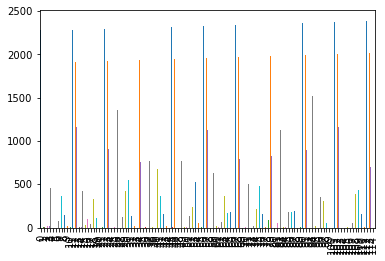

In [134]:
b.plot.bar(legend=None)

<AxesSubplot:>

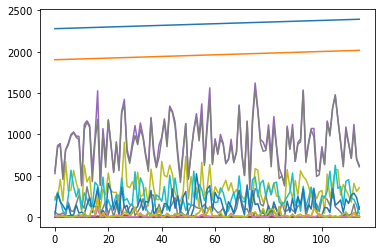

In [135]:
b.plot.line(legend=None)

<AxesSubplot:>

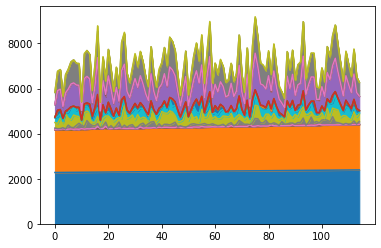

In [136]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

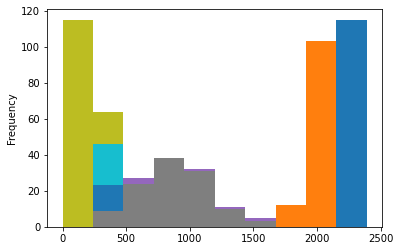

In [137]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='JUL'>

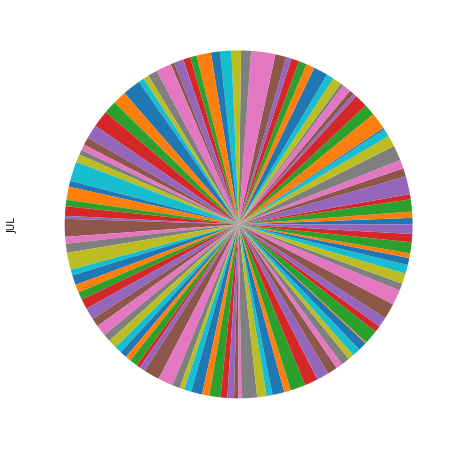

In [138]:
b.plot.pie(y='JUL',figsize=(8,8),labels=None,legend=None)

# DataSet 17

In [139]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book17.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2162,EAST MADHYA PRADESH,1901,48.5,38.1,15.7,10.7,6.2,61.0,367.5,589.2,189.9,5.9,0.0,0.0,1332.7,86.5,32.7,1207.7,5.9
1,2163,EAST MADHYA PRADESH,1902,14.9,8.9,0.0,3.6,2.7,28.0,411.9,227.0,236.6,17.0,27.6,6.1,984.2,23.8,6.2,903.5,50.7
2,2164,EAST MADHYA PRADESH,1903,5.6,2.9,0.3,0.9,37.5,67.5,261.4,366.7,257.4,177.9,0.0,0.0,1178.1,8.5,38.7,953.0,177.9
3,2165,EAST MADHYA PRADESH,1904,2.0,15.3,48.2,0.0,8.6,109.9,443.2,316.6,135.6,44.8,3.2,16.9,1144.2,17.3,56.7,1005.2,65.0
4,2166,EAST MADHYA PRADESH,1905,15.9,8.0,14.3,12.3,10.2,34.4,292.4,243.3,250.9,2.9,0.0,1.6,886.0,23.9,36.7,821.0,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2272,EAST MADHYA PRADESH,2011,0.6,1.9,0.3,7.1,4.7,332.5,323.6,326.9,276.5,1.1,0.0,0.0,1275.2,2.5,12.1,1259.4,1.1
111,2273,EAST MADHYA PRADESH,2012,39.4,0.7,0.6,1.1,1.2,67.8,398.9,351.7,172.6,12.7,3.8,2.7,1053.1,40.0,2.9,990.9,19.2
112,2274,EAST MADHYA PRADESH,2013,2.0,43.4,14.1,9.5,0.3,311.9,456.2,480.8,78.0,124.2,0.5,1.0,1521.9,45.4,23.9,1326.9,125.7
113,2275,EAST MADHYA PRADESH,2014,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9,924.9,81.8,25.3,746.6,71.2


In [140]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

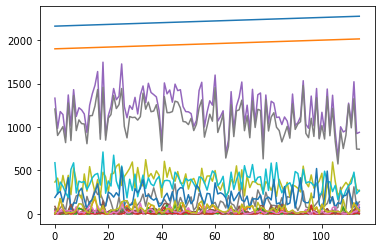

In [141]:
a.plot.line(legend=None)

<AxesSubplot:>

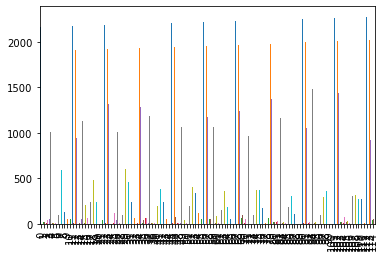

In [142]:
a.plot.bar(legend=None)

<AxesSubplot:>

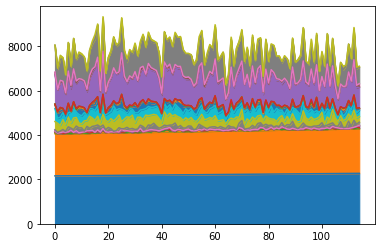

In [143]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

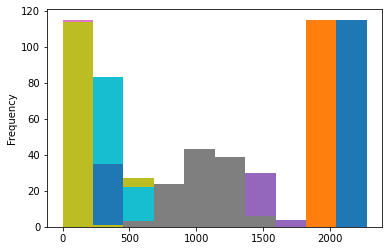

In [144]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAR'>

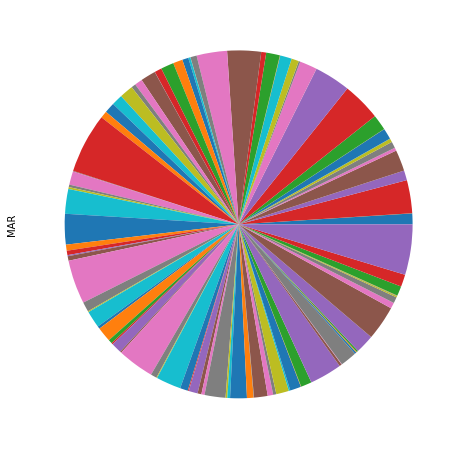

In [145]:
a.plot.pie(y='MAR',figsize=(8,8),labels=None,legend=None)

# DataSet 18

In [146]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book18.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2047,WEST MADHYA PRADESH,1901,25.8,5.8,5.8,2.8,2.1,41.2,228.9,349.9,47.9,5.6,0.0,2.4,718.2,31.6,10.7,667.9,7.9
1,2048,WEST MADHYA PRADESH,1902,22.1,8.4,0.0,2.0,5.9,35.9,401.9,179.4,194.1,37.9,10.0,14.2,911.7,30.5,8.0,811.2,62.0
2,2049,WEST MADHYA PRADESH,1903,5.3,0.0,0.0,0.0,22.3,50.6,304.9,261.1,250.2,55.1,0.0,0.0,949.6,5.3,22.3,866.8,55.1
3,2050,WEST MADHYA PRADESH,1904,3.2,15.5,14.8,0.0,12.0,96.6,273.0,218.6,125.9,3.3,1.8,9.6,774.4,18.7,26.9,714.1,14.7
4,2051,WEST MADHYA PRADESH,1905,3.5,4.4,1.1,0.8,3.0,36.1,326.3,137.6,183.5,0.3,0.0,0.0,696.5,7.9,4.9,683.5,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2157,WEST MADHYA PRADESH,2011,0.0,1.7,0.1,1.8,3.6,241.5,306.7,343.3,165.0,0.2,0.0,0.0,1063.9,1.7,5.5,1056.5,0.2
111,2158,WEST MADHYA PRADESH,2012,6.2,0.0,0.0,0.9,3.1,48.2,439.2,341.2,194.3,2.1,0.0,0.0,1035.2,6.2,4.0,1023.0,2.1
112,2159,WEST MADHYA PRADESH,2013,1.7,31.1,8.5,2.8,0.4,263.7,485.1,432.6,98.9,68.7,0.3,2.4,1396.3,32.8,11.7,1280.4,71.4
113,2160,WEST MADHYA PRADESH,2014,25.6,34.4,4.6,1.4,1.4,30.6,337.4,211.0,192.6,7.0,3.0,15.8,864.9,60.0,7.5,771.6,25.8


In [147]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          114 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       114 non-null    float64
 16  Jan-Feb      114 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

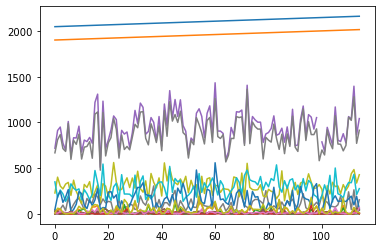

In [148]:
a.plot.line(legend=None)

<AxesSubplot:>

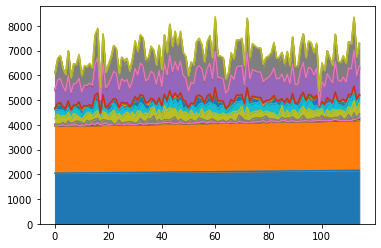

In [149]:
a.plot.area(legend=None)

<AxesSubplot:>

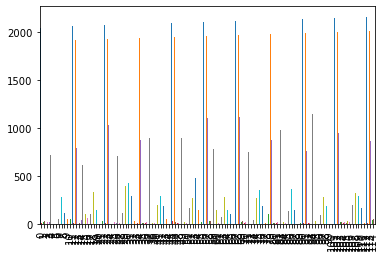

In [150]:
a.plot.bar(legend=None)

<AxesSubplot:ylabel='Frequency'>

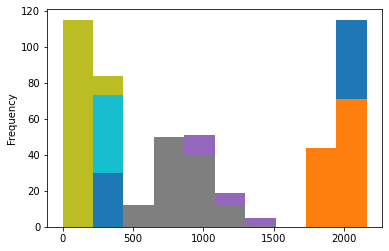

In [151]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='DEC'>

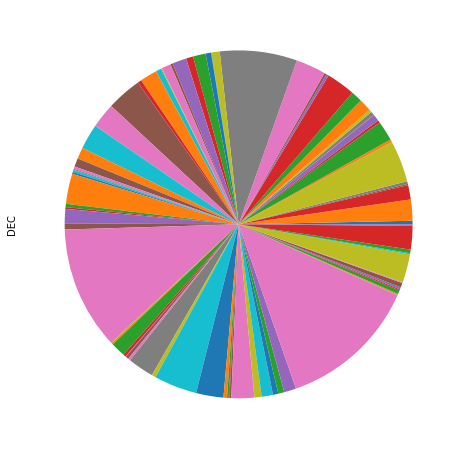

In [152]:
a.plot.pie(y='DEC',figsize=(8,8),labels=None,legend=None)